# General EDA

In [26]:
import pandas as pd

In [27]:
df15 = pd.read_csv("../../Data/raw/2015.csv", delimiter=',')
df16 = pd.read_csv("../../Data/raw/2016.csv", delimiter=',')
df17 = pd.read_csv("../../Data/raw/2017.csv", delimiter=',')
df18 = pd.read_csv("../../Data/raw/2018.csv", delimiter=',')
df19 = pd.read_csv("../../Data/raw/2019.csv", delimiter=',')

### 2015

In [28]:
df15.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


### 2016

In [29]:
df16.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


### 2017

In [30]:
df17.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


### 2018

In [31]:
df18.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


### 2019

In [32]:
df19.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


Comparten información sobre:

- Pais/Región
- Rank (Happpiness?)
- Happiness score (O simplemente score al parecer) [Debemos predecir esta info]
- GDP per capita (Economia)
- Life Expectancy (Health)
- Government Corruption (Trust)
- Generosity
- Freedom

## Unamos los datasets:

In [33]:
df15.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [34]:
df19.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [35]:
# Crear un diccionario de mapeo común para estandarizar nombres de columnas
mapping = {
    'Country or region': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness.Rank': 'Rank',
    'Overall rank': 'Rank',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Healthy life expectancy': 'Life Expectancy',
    'Trust (Government Corruption)': 'Government Corruption',
    'Trust..Government.Corruption.': 'Government Corruption',
    'Perceptions of corruption': 'Government Corruption',
    'Happiness.Score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Freedom to make life choices': 'Freedom'
}

# Crear una lista de los DataFrames y los años correspondientes
dataframes = [(df15, 2015), (df16, 2016), (df17, 2017), (df18, 2018), (df19, 2019)]

# Renombrar columnas y agregar columna Year
for df, year in dataframes:
    df.rename(columns=mapping, inplace=True)
    df['Year'] = year


In [36]:
# Crear un conjunto de columnas para cada DataFrame
columns_15 = set(df15.columns)
columns_16 = set(df16.columns)
columns_17 = set(df17.columns)
columns_18 = set(df18.columns)
columns_19 = set(df19.columns)

# Crear una lista de todos los conjuntos de columnas
all_columns = [columns_15, columns_16, columns_17, columns_18, columns_19]

# Calcular las columnas compartidas por todos los DataFrames (intersección)
shared_columns = set.intersection(*all_columns)

# Calcular todas las columnas únicas en los DataFrames (unión)
all_unique_columns = set.union(*all_columns)

# Calcular las columnas que no son compartidas por todos los DataFrames
non_shared_columns = all_unique_columns - shared_columns

# Mostrar resultados
print("Columnas compartidas en todos los datasets:")
print(shared_columns)
print("\nColumnas que no están en todos los datasets:")
print(non_shared_columns)

Columnas compartidas en todos los datasets:
{'Life Expectancy', 'Rank', 'Government Corruption', 'Year', 'GDP per Capita', 'Freedom', 'Happiness Score', 'Country', 'Generosity'}

Columnas que no están en todos los datasets:
{'Region', 'Lower Confidence Interval', 'Family', 'Upper Confidence Interval', 'Whisker.low', 'Whisker.high', 'Standard Error', 'Dystopia Residual', 'Social support', 'Dystopia.Residual'}


In [37]:
df16.head(1)

,Country,Region,Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP per Capita,Family,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


## Para cuando los unas; la matriz de correlación:

### Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'base_price', 'sold_quantity', 'available_quantity', 'accepts_mercadopago', 'local_pick_up', 'free_shipping', 'condition_dummy']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [39]:
shared_columns = list(shared_columns)
# Seleccionar únicamente las columnas compartidas en cada DataFrame
df15_common = df15[shared_columns]
df16_common = df16[shared_columns]
df17_common = df17[shared_columns]
df18_common = df18[shared_columns]
df19_common = df19[shared_columns]

# Concatenar los DataFrames usando solo las columnas compartidas
merged_df = pd.concat([df15_common, df16_common, df17_common, df18_common, df19_common], axis=0)

# Reiniciar el índice del DataFrame final
merged_df.reset_index(drop=True, inplace=True)

In [42]:
merged_df.head(1)

,Life Expectancy,Rank,Government Corruption,Year,GDP per Capita,Freedom,Happiness Score,Country,Generosity
0,0.94143,1,0.41978,2015,1.39651,0.66557,7.587,Switzerland,0.29678


In [43]:
merged_df.dtypes

Life Expectancy          float64
Rank                       int64
Government Corruption    float64
Year                       int64
GDP per Capita           float64
Freedom                  float64
Happiness Score          float64
Country                   object
Generosity               float64
dtype: object

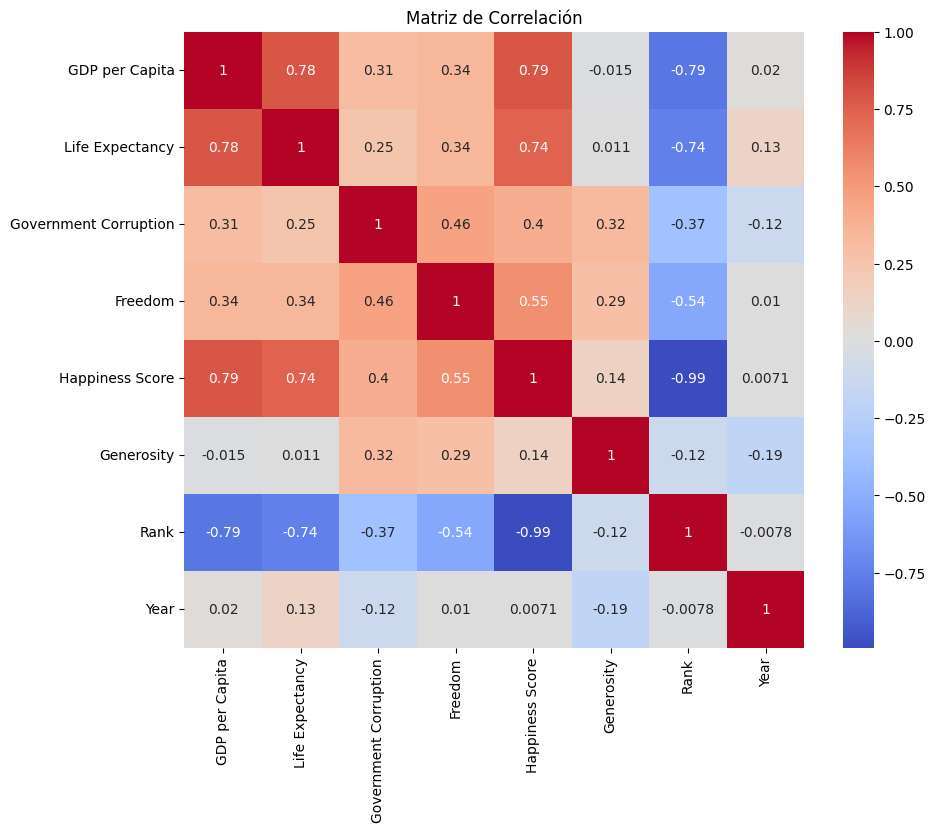

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas numéricas o booleanas relevantes para la correlación en el DataFrame merged_df
columns_to_correlate = ['GDP per Capita', 'Life Expectancy', 'Government Corruption', 
                        'Freedom', 'Happiness Score', 'Generosity', 'Rank', 'Year']

# Crear y visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[columns_to_correlate].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [1]:
merged_df.to_csv("../../Data/clean/merged.csv", index=False)

NameError: name 'merged_df' is not defined

## Modelos

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas de características (excluyendo 'Rank') y la columna objetivo
X = merged_df[['GDP per Capita', 'Life Expectancy', 'Freedom']]
y = merged_df['Happiness Score']

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear instancias de los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Diccionario para almacenar resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

    # Si es el modelo Random Forest, guárdalo en un archivo .pkl usando joblib
    if name == "Random Forest":
        joblib.dump(model, "../random_forest_model.pkl")

# Mostrar resultados
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")


Linear Regression: MSE = 0.37, R2 Score = 0.70
Random Forest: MSE = 0.34, R2 Score = 0.73
K-Nearest Neighbors: MSE = 0.35, R2 Score = 0.72
